# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 580


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"
  
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Send GET request
        response = requests.get(city_url) # Store City Code, [stored successfully]
        
        # Parse the JSON and retrieve data 
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sofifi
City not found. Skipping...
Processing Record 2 of Set 1 | fortuna
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | papatowai
Processing Record 5 of Set 1 | udachny
Processing Record 6 of Set 1 | saint-philippe
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | nogliki
Processing Record 9 of Set 1 | invercargill
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | qianzhou
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | espargos
City not found. Skipping...
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | kodiak
Processing Record 16 of Set 1 | wailua homesteads
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | homer
Processing Record 19 of Set 1 | kemin
Processing Record 20 of Set 1 | petropavlovsk-kamchatsky
Processing Rec

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          547
Lat           547
Lng           547
Max Temp      547
Humidity      547
Cloudiness    547
Wind Speed    547
Country       547
Date          547
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,fortuna,40.5982,-124.1573,18.70,56,0,12.86,US,1706663122
1,bredasdorp,-34.5322,20.0403,18.64,95,58,2.22,ZA,1706663122
2,papatowai,-46.5619,169.4708,18.68,58,100,3.27,NZ,1706663122
3,udachny,66.4167,112.4000,-27.15,100,98,1.04,RU,1706663122
4,saint-philippe,-21.3585,55.7679,25.77,84,47,3.89,RE,1706662892


In [6]:
# Create the directory if it doesn't exist
#directory = "output_data"
#if not os.path.exists(directory):
#    os.makedirs(directory)

# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fortuna,40.5982,-124.1573,18.70,56,0,12.86,US,1706663122
1,bredasdorp,-34.5322,20.0403,18.64,95,58,2.22,ZA,1706663122
2,papatowai,-46.5619,169.4708,18.68,58,100,3.27,NZ,1706663122
3,udachny,66.4167,112.4000,-27.15,100,98,1.04,RU,1706663122
4,saint-philippe,-21.3585,55.7679,25.77,84,47,3.89,RE,1706662892


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

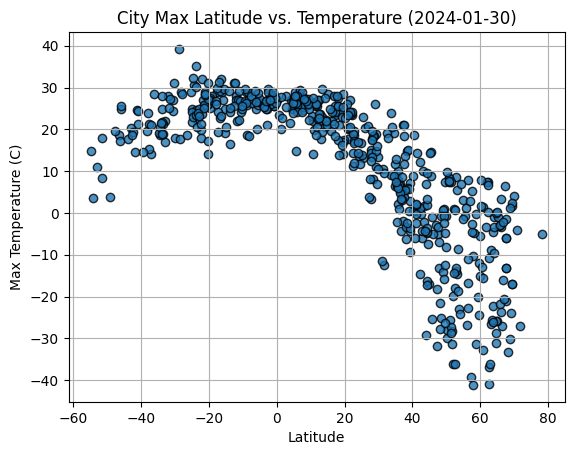

In [8]:
# Build scatter plot for latitude vs. temperature (Guidance from AskBCs)
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

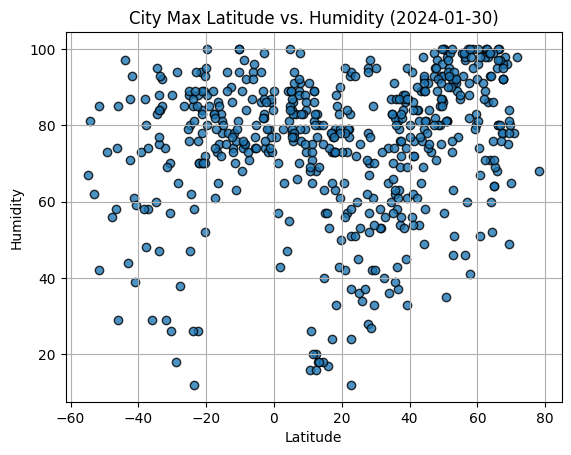

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

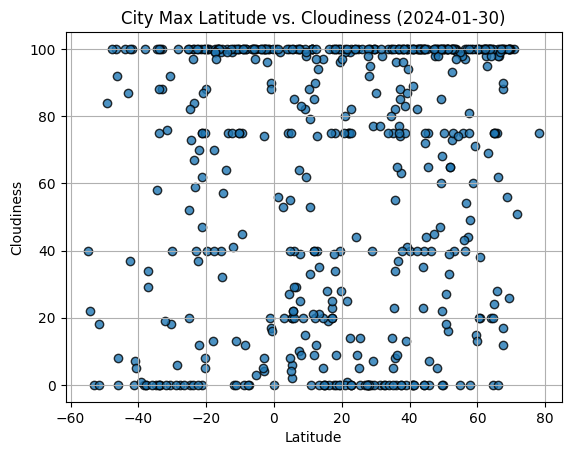

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

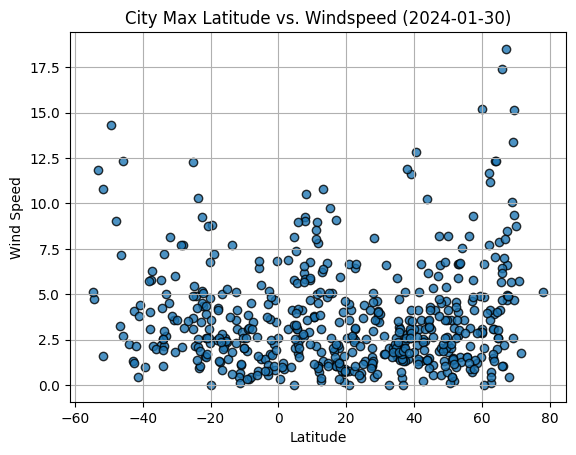

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Windspeed (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values):

    x_values = city_data_df['Lat']
    y_values = city_data_df['Max Temp']

#defining the function:
#def func_name (parameter1, parameter2):
------
#calling the function:
#parameter1 = "anything you need to pass to the function"
#parameter2 = "anything you need to pass to the function"
#func_name (parameter1, parameter2)

SyntaxError: invalid syntax (4153987066.py, line 9)

In [14]:
# Filter the DataFrame for northern hemisphere (latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display the DataFrame
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fortuna,40.5982,-124.1573,18.70,56,0,12.86,US,1706663122
3,udachny,66.4167,112.4000,-27.15,100,98,1.04,RU,1706663122
6,nogliki,51.8333,143.1667,-19.81,93,65,3.13,RU,1706663123
9,qianzhou,28.3167,109.7167,8.22,97,100,0.41,CN,1706663123
12,kodiak,57.7900,-152.4072,-10.27,41,0,4.12,US,1706663124


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bredasdorp,-34.5322,20.0403,18.64,95,58,2.22,ZA,1706663122
2,papatowai,-46.5619,169.4708,18.68,58,100,3.27,NZ,1706663122
4,saint-philippe,-21.3585,55.7679,25.77,84,47,3.89,RE,1706662892
5,edinburgh of the seven seas,-37.0676,-12.3116,14.13,58,29,2.13,SH,1706662855
7,invercargill,-46.4000,168.3500,17.23,74,92,7.15,NZ,1706663114


###  Temperature vs. Latitude Linear Regression Plot

In [16]:
def linear_regression_northern_hemisphere(df, x_col, y_col):
    # Filter data for Northern Hemisphere (where Latitude > 0)
    northern_hemi_df

    # Extract x and y values
    x_values = northern_hemi_df['Lat']
    y_values = northern_hemi_df[""]

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

    # Return the linear regression parameters
    return slope, intercept, r_value, p_value, std_err


R-squared: 0.6665550186077441


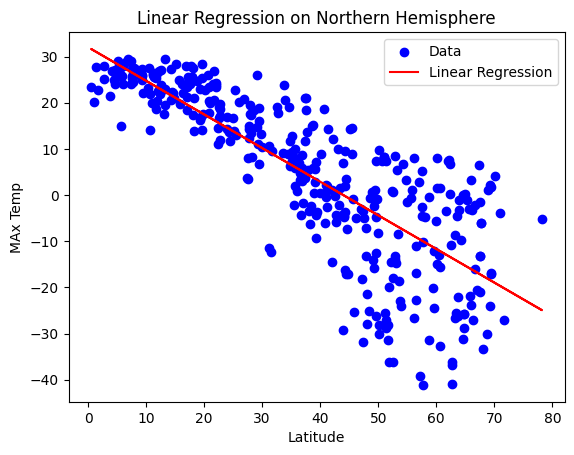

In [17]:
# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

# Calculate regression line
regress_values = northern_hemi_df['Lat'] * slope + intercept

# Plot the data points
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], color='blue', label='Data')

# Plot the regression line
plt.plot(northern_hemi_df['Lat'], regress_values, color='red', label='Linear Regression')

# Add labels and legend
plt.xlabel('Latitude')
plt.ylabel('MAx Temp')
plt.title('Linear Regression on Northern Hemisphere')
plt.legend()

# Print the r-squared value
print(f"R-squared: {rvalue**2}")

# Show plot
plt.show()

R-squared: 0.29155418737692745


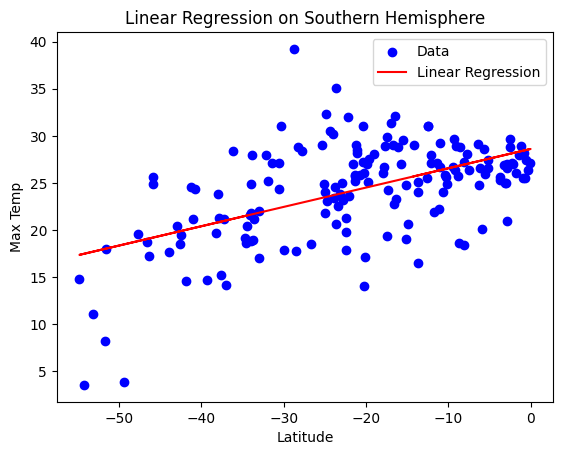

In [18]:
# Linear regression on Southern Hemisphere
# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

# Calculate regression line
regress_values = southern_hemi_df['Lat'] * slope + intercept

# Plot the data points
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], color='blue', label='Data')

# Plot the regression line

plt.plot(southern_hemi_df['Lat'], regress_values, color='red', label='Linear Regression')

# Add labels and legend
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Linear Regression on Southern Hemisphere')
plt.legend()


# Print the r-squared value
print(f"R-squared: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

As further deep in the norther hemisphere the cooler it gets, now when looking at the south the deeper its the same for southern hemi which makes sense because they are getting further away from the sun

### Humidity vs. Latitude Linear Regression Plot

R-squared: 0.09887097250655165


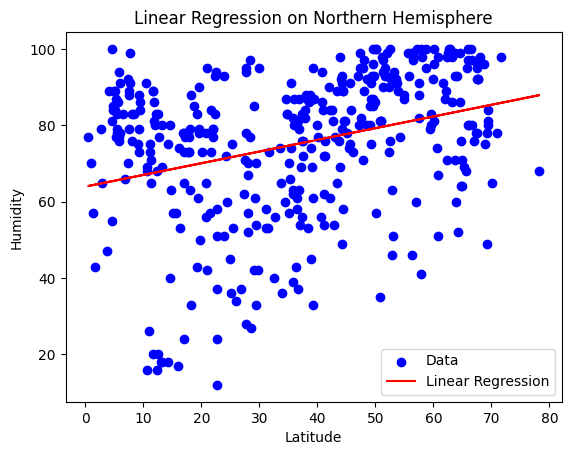

In [19]:
# Northern Hemisphere
# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

# Calculate regression line
regress_values = northern_hemi_df['Lat'] * slope + intercept

# Plot the data points
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], color='blue', label='Data')

# Plot the regression line
plt.plot(northern_hemi_df['Lat'], regress_values, color='red', label='Linear Regression')

# Add labels and legend
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Linear Regression on Northern Hemisphere')
plt.legend()

# Print the r-squared value
print(f"R-squared: {rvalue**2}")

# Show plot
plt.show()

R-squared: 0.11394980790957944


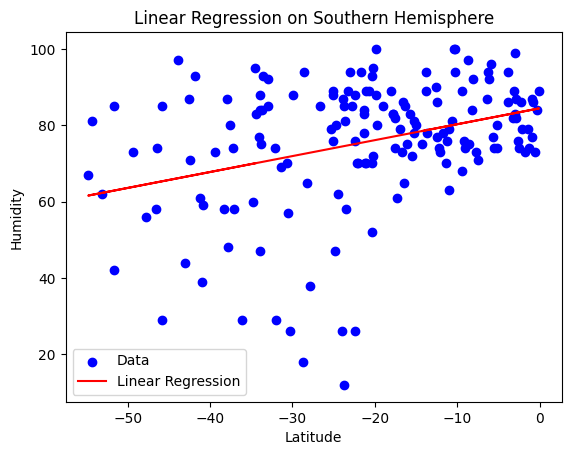

In [20]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

# Calculate regression line
regress_values = southern_hemi_df['Lat'] * slope + intercept

# Plot the data points
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], color='blue', label='Data')

# Plot the regression line

plt.plot(southern_hemi_df['Lat'], regress_values, color='red', label='Linear Regression')

# Add labels and legend
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Linear Regression on Southern Hemisphere')
plt.legend()


# Print the r-squared value
print(f"R-squared: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

I dont really see any relationship between both because no matter if you get close or far you still get high humidity in south or north hemi 

### Cloudiness vs. Latitude Linear Regression Plot

R-squared: 0.060040430287388605


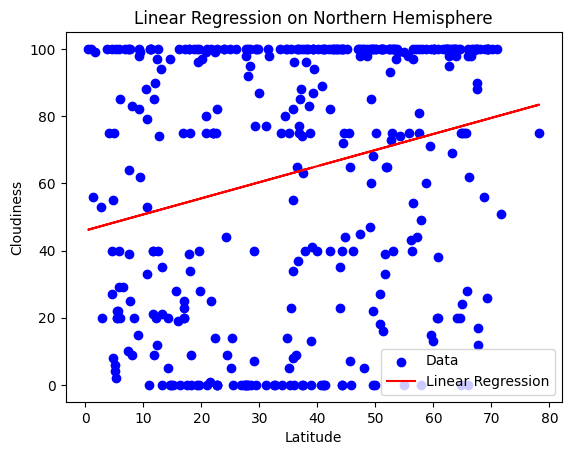

In [21]:
# Northern Hemisphere
# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

# Calculate regression line
regress_values = northern_hemi_df['Lat'] * slope + intercept

# Plot the data points
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], color='blue', label='Data')

# Plot the regression line
plt.plot(northern_hemi_df['Lat'], regress_values, color='red', label='Linear Regression')

# Add labels and legend
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Linear Regression on Northern Hemisphere')
plt.legend()

# Print the r-squared value
print(f"R-squared: {rvalue**2}")

# Show plot
plt.show()

R-squared: 0.06990599385476096


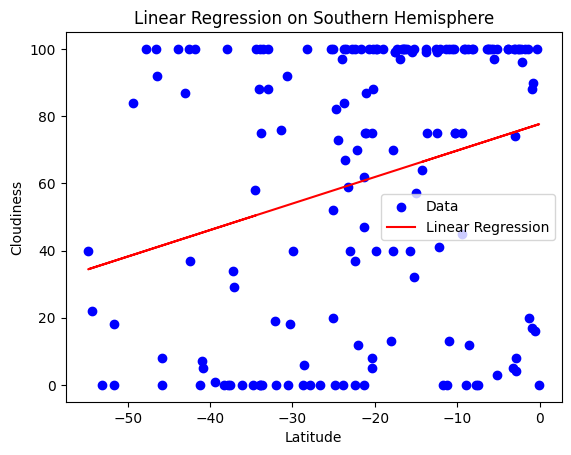

In [22]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

# Calculate regression line
regress_values = southern_hemi_df['Lat'] * slope + intercept

# Plot the data points
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], color='blue', label='Data')

# Plot the regression line

plt.plot(southern_hemi_df['Lat'], regress_values, color='red', label='Linear Regression')

# Add labels and legend
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Linear Regression on Southern Hemisphere')
plt.legend()


# Print the r-squared value
print(f"R-squared: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Again really no relationship cloudiness doesn't depend on the latitude or which side of the hemi you are in, it just depends which city is know for cloudiness 

### Wind Speed vs. Latitude Linear Regression Plot

R-squared: 0.022237674532018286


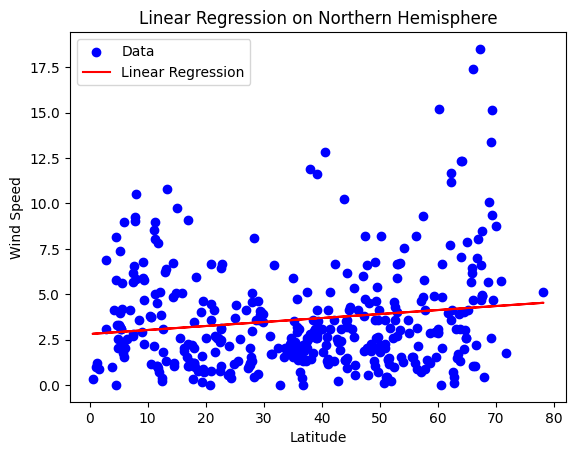

In [23]:
# Northern Hemisphere
# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

# Calculate regression line
regress_values = northern_hemi_df['Lat'] * slope + intercept

# Plot the data points
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], color='blue', label='Data')

# Plot the regression line
plt.plot(northern_hemi_df['Lat'], regress_values, color='red', label='Linear Regression')

# Add labels and legend
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Linear Regression on Northern Hemisphere')
plt.legend()

# Print the r-squared value
print(f"R-squared: {rvalue**2}")

# Show plot
plt.show()

R-squared: 0.11587576139714174


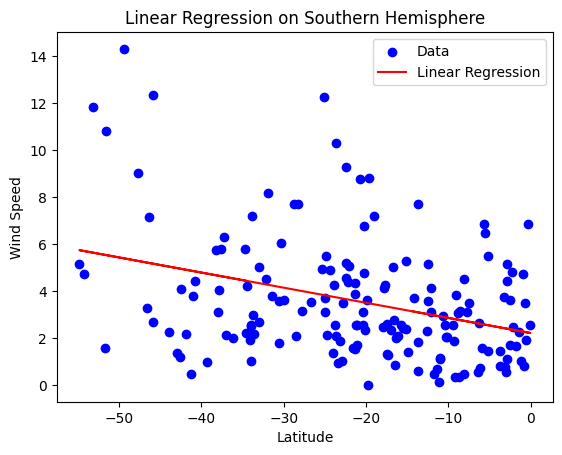

In [24]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

# Calculate regression line
regress_values = southern_hemi_df['Lat'] * slope + intercept

# Plot the data points
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], color='blue', label='Data')

# Plot the regression line

plt.plot(southern_hemi_df['Lat'], regress_values, color='red', label='Linear Regression')

# Add labels and legend
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Linear Regression on Southern Hemisphere')
plt.legend()


# Print the r-squared value
print(f"R-squared: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

It gets very intresting the further you are away from the middle of the earth it's more possible for extreme windy weather, nearer the center of the earth you tend to have less wind speed 